### Стэкинг: вариант с усреднением предсказаний

In [59]:
import numpy as np

from sklearn.model_selection import KFold
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

import sklearn.dummy
import sklearn.svm

Тестовый набор данных - изображения цифр размера 8x8. Например:

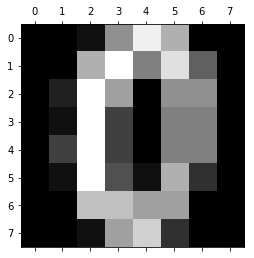

In [76]:
import matplotlib.pyplot as plt 
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[10]) 
plt.show() 

Зададим k - количество частей, на которые мы будем разбивать данные.

In [77]:
k = 6

Инициализируем данные и классификатор:

In [90]:
X_all, y_all = load_digits(return_X_y = True)

classifier = sklearn.svm.SVC(gamma=0.001)

Для сравнения обучим классификатор на половине данных и используем вторую половину в качестве тестовой. Посчитаем точность полученных предсказаний:

In [80]:
l = len(X_all)
classifier.fit(X_all[:l/2], y_all[:l/2])
pred = classifier.predict(X_all[l/2:])

scores = accuracy_score(y_all[l/2:], pred)
print scores

0.968854282536


In [85]:
method='predict'
method_to_call = getattr(classifier, method)
p = method_to_call(X_all)

Реализуем стэкинг:

In [88]:
def stack_pred(estimator, X, y, Xt, k=3, method='predict'):
    method_to_call = getattr(estimator, method)
    kf = KFold(n_splits = k, shuffle = True, random_state = 0)
    
    pred_train = []
    pred_test = []
    for train_index, test_index in kf.split(X_all):
        X_train, X_test = X_all[train_index], X_all[test_index]
        y_train, y_test = y_all[train_index], y_all[test_index]
        estimator.fit(X_train, y_train)
        
        pred = method_to_call(X)
        pred_train.append(pred)
    
        pred = method_to_call(Xt)
        pred_test.append(pred)
        
    result_train = np.mean(np.array(pred_train), axis = 0)
    result_test = np.mean(np.array(pred_test), axis = 0)
    
    return result_train.astype(int), result_test.astype(int)

Получилось точнее, чем обучать только на половине тестовых данных

In [89]:
sX, sXt = stack_pred(classifier, X_all[:l/2], y_all[:l/2], X_all[l/2:], 6)

l = len(X_all)
print accuracy_score(y_all[l/2:], sXt)
print accuracy_score(y_all[:l/2], sX)

0.994438264739
0.993318485523
